In [1]:
from qiskit import *
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

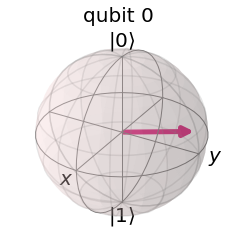

<Figure size 432x288 with 0 Axes>

In [2]:
state = qiskit.quantum_info.random_statevector(2)
init_gate = qiskit.extensions.Initialize(state)
fig = plt.figure()
plot_bloch_multivector(state)

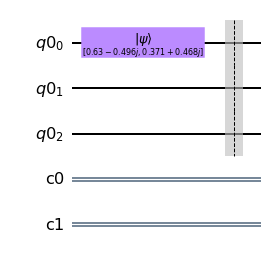

In [3]:
qubits = QuantumRegister(size=3)
first_bit = ClassicalRegister(size=1)
second_bit = ClassicalRegister(size=1)

circuit = QuantumCircuit(qubits,first_bit,second_bit)
circuit.append(init_gate,[0])
circuit.barrier()
circuit.draw(output='mpl')

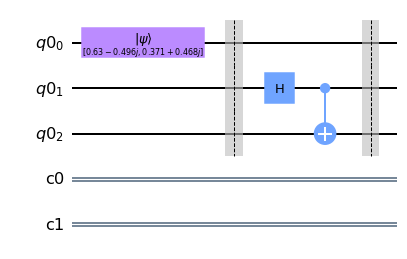

In [4]:
circuit.h(qubits[1])
circuit.cx(control_qubit=qubits[1],target_qubit=qubits[2])
circuit.barrier()
circuit.draw(output='mpl')

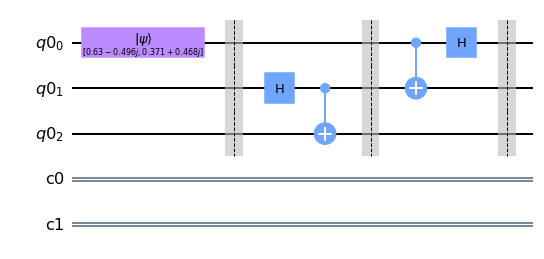

In [5]:
circuit.cx(control_qubit=qubits[0],target_qubit=qubits[1])
circuit.h(qubits[0])
circuit.barrier()
circuit.draw(output='mpl')

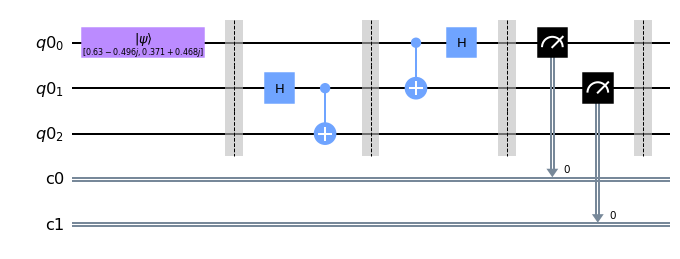

In [6]:
circuit.measure(qubits[0],first_bit)
circuit.measure(qubits[1],second_bit)
circuit.barrier()
circuit.draw(output='mpl')

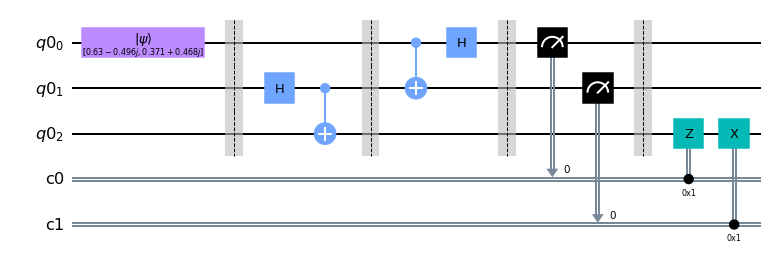

In [7]:
circuit.z(qubits[2]).c_if(first_bit,1)
circuit.x(qubits[2]).c_if(second_bit,1)
circuit.draw(output='mpl')

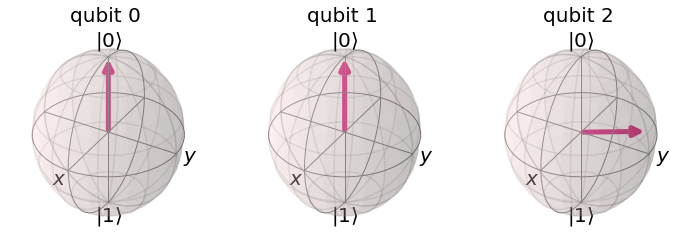

In [8]:
backend=BasicAer.get_backend('statevector_simulator')
out_vector=execute(circuit,backend).result().get_statevector()
plot_bloch_multivector(out_vector)

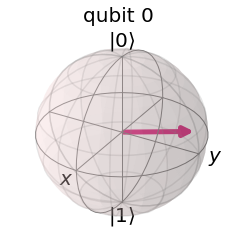

In [9]:
plot_bloch_multivector(state)